In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
%matplotlib inline

### About the dataset   

The dataset extracted and is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html], consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|ID|Clump thickness|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|  

*The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4)*   


**The objective is to build a machine learning algorithm (in this case a SVM) to accuratly predict wether a tumor is benign(2) or malignant(4). The aim of the model is to have a high recall rate (probabilty of detection)**

In [2]:
# csv url to be imported
csv_url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv'

# dataframe
df = pd.read_csv(csv_url)
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Ensure data is clean 

In [3]:
# counting occurences of the different tumour types
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [4]:
# converting tumor type values. Benign(2) changes to 0, Malignant(4) changes to 1
df['Class'] = df['Class'].map({2: 0, 4: 1})

In [5]:
df['Class'].value_counts()

0    458
1    241
Name: Class, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID             699 non-null int64
Clump          699 non-null int64
UnifSize       699 non-null int64
UnifShape      699 non-null int64
MargAdh        699 non-null int64
SingEpiSize    699 non-null int64
BareNuc        699 non-null object
BlandChrom     699 non-null int64
NormNucl       699 non-null int64
Mit            699 non-null int64
Class          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [7]:
# ensuring there are no missing values
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [8]:
# data types of dataset
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [9]:
# 'BareNuc' should be converted to an int data type
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df['BareNuc'].dtypes

dtype('int64')

## Analyse data

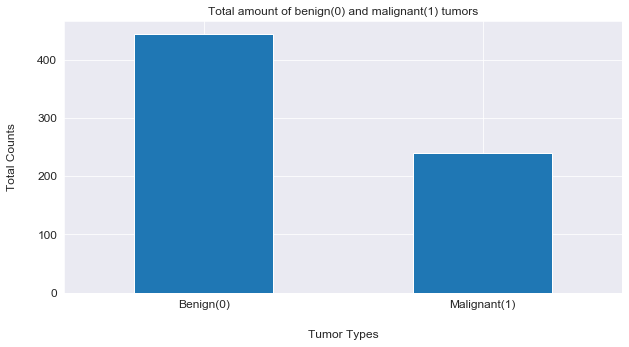

0    65.01
1    34.99
Name: Class, dtype: float64


In [10]:
fig, ax1 = plt.subplots(figsize=(10,5))
# plotting bar graph using pandas
df['Class'].value_counts().plot(kind='bar',
                               title='Total amount of benign(0) and malignant(1) tumors',
                               fontsize=12);

# labels on x axis
plt.xlabel('Tumor Types', 
           fontsize=12, 
           labelpad=20)
# labels on y axis
plt.ylabel("Total Counts", 
           fontsize=12, 
           labelpad=20)
# changing values of xticks
ax1.set_xticklabels(['Benign(0)', 'Malignant(1)'], 
                    rotation=0)
plt.show()

print(round(df['Class'].value_counts(normalize=True) * 100, 2))

*From the bar plot aove we can see that malignant tumors have a high presence in the dataset at 34.99%* 
*This indicates that tumors tend to be cancerous around 35% of the time*

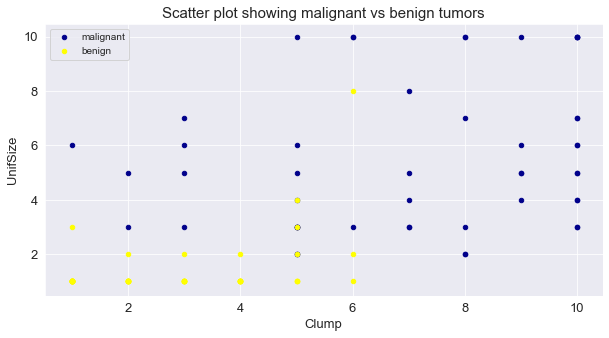

In [11]:
# plotting malignant tumors with darkblue
ax1 = df[df['Class'] == 1][0:50].plot(kind='scatter',
                                      x='Clump',
                                      y='UnifSize',
                                      color='DarkBlue', 
                                      label='malignant',
                                      figsize=(10,5),
                                      fontsize=13);
# plotting benign tumors with yellow
df[df['Class'] == 0][0:50].plot(kind='scatter',
                                x='Clump',
                                y='UnifSize',
                                color='Yellow', 
                                label='benign', 
                                ax=ax1);
plt.title('Scatter plot showing malignant vs benign tumors', fontsize=15)
plt.xlabel('Clump', fontsize=13)
plt.ylabel('UnifSize', fontsize=13)
plt.show()

In [12]:
df.corr()['Class'].sort_values()

ID            -0.084701
Mit            0.423448
SingEpiSize    0.690958
MargAdh        0.706294
Clump          0.714790
NormNucl       0.718677
BlandChrom     0.758228
UnifSize       0.820801
UnifShape      0.821891
BareNuc        0.822696
Class          1.000000
Name: Class, dtype: float64

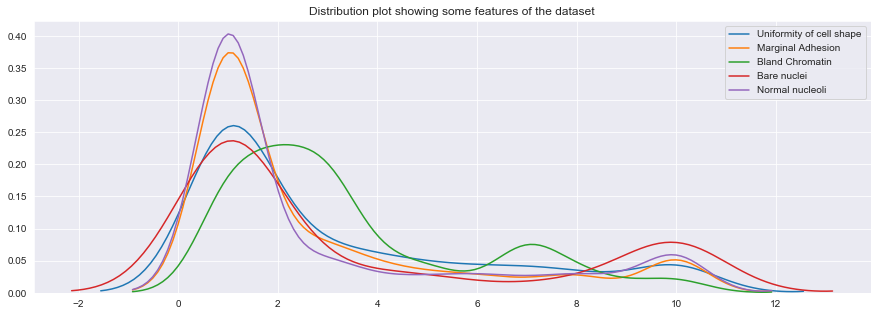

In [13]:
# distribution plots of a few of the features
plt.figure(figsize=(15,5));
ax1 = sns.distplot(df['UnifShape'], hist=False, label='Uniformity of cell shape');
sns.distplot(df['MargAdh'], ax=ax1, hist=False, label='Marginal Adhesion')
sns.distplot(df['BlandChrom'], ax=ax1, hist=False, label='Bland Chromatin')
sns.distplot(df['BareNuc'], ax=ax1, hist=False, label='Bare nuclei')
sns.distplot(df['NormNucl'], ax=ax1, hist=False, label='Normal nucleoli')
plt.title('Distribution plot showing some features of the dataset')
plt.xlabel(xlabel=None)
plt.show()

The features may benefit from normalization. For the SVM model it will improve results and accuracy of the model.

# Feature Selection and Building ML Model

In [14]:
# x values / feature selection
X = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
# target variable
y = df['Class']

In [15]:
# importing necessary models to create ML model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# importing evaluation metrics
from sklearn.metrics import recall_score, roc_auc_score, classification_report, f1_score, confusion_matrix

In [16]:
# splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(546, 9) (546,)
(137, 9) (137,)


In [17]:
# for the best results using a SVM classifier, data should be normalized for best results
# creating scale object 
scale = MinMaxScaler()
# fit and transforms on training data
x_train_scaled = scale.fit_transform(x_train)
# transforming testing data
x_test_scaled = scale.transform(x_test)

In [18]:
# find the optimal kernel that maximizes the recall rate
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for k in kernels:
    clf = SVC(kernel=k, gamma=1.0).fit(x_train_scaled, y_train)
    yhat = clf.predict(x_test_scaled)
    score = clf.score(x_test_scaled, y_test)
    roc_score = roc_auc_score(y_test, yhat)
    recall = recall_score(y_test, yhat)
    print('\nKernel: ', k,
          '\nAccuracy: ', round(score*100,4),
         '\nRoc Score: ', round(roc_score*100,4),
         '\nRecall Score: ', round(recall*100,4))


Kernel:  linear 
Accuracy:  95.6204 
Roc Score:  95.7011 
Recall Score:  96.0

Kernel:  rbf 
Accuracy:  96.3504 
Roc Score:  96.7011 
Recall Score:  98.0

Kernel:  poly 
Accuracy:  96.3504 
Roc Score:  96.2759 
Recall Score:  96.0

Kernel:  sigmoid 
Accuracy:  72.2628 
Roc Score:  68.3793 
Recall Score:  54.0


### Since the model must optimize the probaility of detection, the radial basis function has the best scores for recall and area_under_curve (roc).

In [19]:
# from the above, the radial basis function kernel performs best
# now find optimal parameters
roc_scores = []
recall = []
n=1
for g in [0.01, 0.1, 1, 5]:
    for cs in [0.01, 0.1, 1, 5]:
        
        clf = SVC(kernel='rbf', gamma=g, C=cs).fit(x_train_scaled, y_train)
        yhat = clf.predict(x_test_scaled)
        roc_scores.append(roc_auc_score(y_test, yhat))
        recall.append(recall_score(y_test, yhat))
        print(n, '- Gamma: ', g, 
             ' C: ', cs)
        n+=1

print('Recall Scores:\n', recall)
print('ROC Scores:\n', roc_scores)

1 - Gamma:  0.01  C:  0.01
2 - Gamma:  0.01  C:  0.1
3 - Gamma:  0.01  C:  1
4 - Gamma:  0.01  C:  5
5 - Gamma:  0.1  C:  0.01
6 - Gamma:  0.1  C:  0.1
7 - Gamma:  0.1  C:  1
8 - Gamma:  0.1  C:  5
9 - Gamma:  1  C:  0.01
10 - Gamma:  1  C:  0.1
11 - Gamma:  1  C:  1
12 - Gamma:  1  C:  5
13 - Gamma:  5  C:  0.01
14 - Gamma:  5  C:  0.1
15 - Gamma:  5  C:  1
16 - Gamma:  5  C:  5
Recall Scores:
 [0.0, 0.2, 0.88, 0.9, 0.0, 0.9, 0.94, 0.96, 0.92, 0.98, 0.98, 0.98, 0.0, 1.0, 1.0, 1.0]
ROC Scores:
 [0.5, 0.6, 0.9227586206896551, 0.9327586206896551, 0.5, 0.9327586206896551, 0.9527586206896552, 0.9570114942528736, 0.9370114942528736, 0.9670114942528737, 0.9670114942528737, 0.9727586206896552, 0.5, 0.9540229885057472, 0.9712643678160919, 0.9770114942528736]


In [20]:
# finding optimal gamma and c values
print('ROC Score Position:\n', np.array(roc_scores).argmax() + 1)
print('Recall Score Position:\n', np.array(recall).argmax()+1)

ROC Score Position:
 16
Recall Score Position:
 14


**Since the recall rate has a perfect score of 1 at positions (14,15,16), and the ROC score is maximized at position 16, the optimum value for C is 5 while gamma=5.**

## Building the final model  

              precision    recall  f1-score   support

      Benign       1.00      0.95      0.98        87
   Malignant       0.93      1.00      0.96        50

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137

F1 score of:  96.1538
Models Accuracy:  97.0803
Classification Error:  2.9197
Recall Score:  100.0
Roc Score:  98.0 4


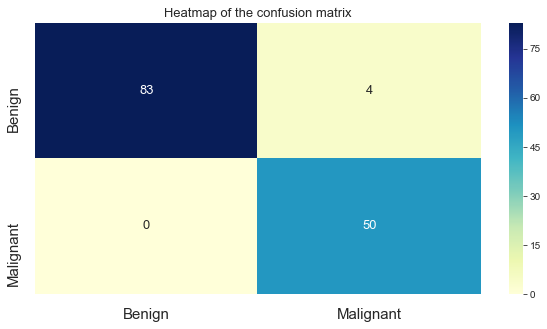

In [21]:
# best parameters that optimize the model are at gamma=5, C=5

# Build model
clf_final = SVC(kernel='rbf', gamma=5, C=5).fit(x_train_scaled, y_train)
# predictions
yhat = clf_final.predict(x_test_scaled)

# score of final model
acc_final = clf.score(x_test_scaled, y_test)
# f1 score using weighted average
f1_final = f1_score(y_test, yhat)
# recall score
recall_final = recall_score(y_test, yhat)
# roc score
roc_final = roc_auc_score(y_test, yhat)

# classification report
report_final = classification_report(y_test, yhat, target_names=['Benign', 'Malignant'])
print(report_final)

# confusion matrix of results
matrix_final = confusion_matrix(y_test, yhat)

# plotting heatmap using the matrix
fig, ax1 = plt.subplots(figsize=(10,5))

heat_df = sns.heatmap(pd.DataFrame(matrix_final), 
                      xticklabels=['Benign', 'Malignant'],
                      annot=True, 
                      cmap="YlGnBu", 
                      fmt='.2g',
                      yticklabels=['Benign', 'Malignant'],
                      annot_kws={"size":13},
                      ax=ax1)
# showing heatmap
heat_df;
plt.title('Heatmap of the confusion matrix', fontsize=13)
ax1.tick_params(labelsize=15, pad=10)

# printing the scores
print('F1 score of: ', round(f1_final * 100, 4))
print('Models Accuracy: ', round(acc_final * 100, 4))
print('Classification Error: ', round((1-acc_final) * 100, 4))
print('Recall Score: ', round(recall_final * 100))
print('Roc Score: ', round(roc_final * 100), 4)

## Conclusion and Findings   

The model has a perfect recall rate of 100% mean that it has a high probability of detecting a cancerous tumor!  
The model also has a high f1 score of 96.15% and a low classification error of only 2.91%. Overall the accuracy (97%) and recall scores of model shows that it has performed optimally.

Using gridsearchCV may be used to find the optimal parameters more effeciently (shown below).

### Using GridSearchCV to find optimum parameters

In [30]:
# parameters for gridsearch
grid_params = {'gamma': [0.01, 0.1, 1, 5], 
              'C': [0.01, 0.1, 1, 5]}

# svm model with radial basis kernel
clf = SVC(kernel='rbf')

# gridsearchcv object
grid_clf = GridSearchCV(clf, param_grid=grid_params, cv=5, scoring='roc_auc')
# fitting grid object
grid_clf.fit(x_train_scaled, y_train)

# best parameters found by GridSearchCV
best_parameters = grid_clf.best_params_
grids_score = grid_clf.score(x_test_scaled, y_test)

print('Best Parameters: ', best_parameters)
print('Best Score: ', round(grids_score * 100, 4))
print('Recall Score of: ', round(recall_score(y_test, grid_clf.predict(x_test_scaled)) * 100))

Best Parameters:  {'C': 1, 'gamma': 0.01}
Best Score:  99.4943
Recall Score of:  88.0


              precision    recall  f1-score   support

      Benign       0.93      0.97      0.95        87
   Malignant       0.94      0.88      0.91        50

    accuracy                           0.93       137
   macro avg       0.93      0.92      0.93       137
weighted avg       0.93      0.93      0.93       137

F1 score of:  90.7216
Models Accuracy:  93.4307
Classification Error:  6.5693
Recall score:  88.0
Roc score:  92.2759


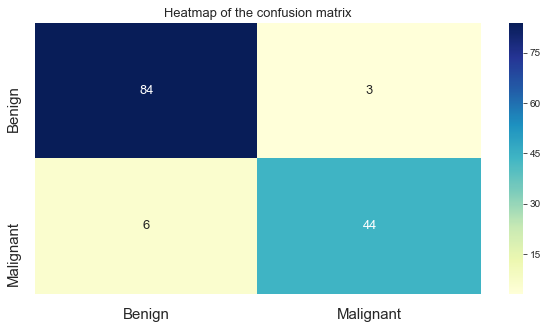

In [31]:
# build final model using gamma=0.01 and C=1
clf = SVC(kernel='rbf', gamma=0.01, C=1).fit(x_train_scaled, y_train)
yhat = clf.predict(x_test_scaled)

# accuracy
acc_grid = clf.score(x_test_scaled, y_test)
# f1 score
f1_grid = f1_score(y_test, yhat)
# recall score
recall_grid = recall_score(y_test, yhat)
# auc score 
roc_grid = roc_auc_score(y_test, yhat)

# classification report
report = classification_report(y_test, yhat, target_names=['Benign', 'Malignant'])
print(report)

# matrix of results
matrix = confusion_matrix(y_test, yhat)

# plotting heatmap using the matrix
fig, ax1 = plt.subplots(figsize=(10,5))

# creating heatmap
heat_df = sns.heatmap(pd.DataFrame(matrix), 
                      xticklabels=['Benign', 'Malignant'],
                      annot=True, 
                      cmap="YlGnBu", 
                      fmt='.2g',
                      annot_kws={'size': 13},
                      yticklabels=['Benign', 'Malignant'],
                      ax=ax1)
# showing heatmap
heat_df;
plt.title('Heatmap of the confusion matrix', fontsize=13)
ax1.tick_params(labelsize=15, pad=10)

print('F1 score of: ', round(f1_grid * 100, 4))
print('Models Accuracy: ', round(acc_grid * 100, 4))
print('Classification Error: ', round((1-acc_grid) * 100, 4))
print('Recall score: ', round(recall_grid * 100, 4))
print('Roc score: ', round(roc_grid * 100, 4))

### Conclusion on GridSearchCV  

Using GridSearchCV actually did not perform as optimally as our intial model. The gridsearch optimal parameters returned a recall rate of 88% which is incredible poor considering how important it is to find a cancerous tumour. The classification error of 6.5% is also higher than our initial model.

In [32]:
# Evaluation on gridseacrh vs manual searching
print('SVM  Model Recall Score: ', round(recall_final * 100, 2), '%')
print('GridSearchCV Accuracy: ', round(recall_grid * 100, 2), '%')
print('\nSVM Model Roc Score: ', round(roc_final * 100, 4))
print('GridSearchCV Roc Score: ', round(roc_grid * 100, 4))
print('\nSVM Model f1 score: ', round(f1_final * 100, 2), '%')
print('GridSearchCV f1 score: ', round(f1_grid * 100, 2), '%')
print('\nSVM Model Classification Error: ', round((1-acc_final) * 100, 2), '%')
print('GridSearchCV Classification Error: ', round((1-acc_grid) * 100, 2), '%')

SVM  Model Recall Score:  100.0 %
GridSearchCV Accuracy:  88.0 %

SVM Model Roc Score:  97.7011
GridSearchCV Roc Score:  92.2759

SVM Model f1 score:  96.15 %
GridSearchCV f1 score:  90.72 %

SVM Model Classification Error:  2.92 %
GridSearchCV Classification Error:  6.57 %


# Final Conclusion on GridSearch and SVM   

From the above analysis, the GridSearchCV underperformed. The initial SVM model had a higher recall rate of 100% as opposed to the gridsearch of 88%. The classification error with the initial model is lower than the gridearch, indicating that our model is more accurate in predicting the correct class. It also outperformed in terms of the f1 score.

The optimum model found here is a Kernalized Support Vector Machine (SVM). The kernel used is a radial basis function kernel (rbf) with a gamma value of 5 and C value of 5.